In [27]:
import pandas as pd

In [28]:
import numpy as np

We use pd.read_csv to load the data frame.

In [29]:
df = pd.read_csv("Student_performance_data _.csv")

The head() method is used to look at the top five values

In [30]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<h2>Information about the data set</h2>


**Student Information**
-> Student ID
-> Demographic Details
-> Study Habits

**Parental Involvement**

**Extracurricular Activities**

**Academic Performance**

**Target Variable: Grade Class**

**<h4>Student Information</h4>**

Student ID

StudentID: A unique identifier assigned to each student (1001 to 3392).

<h5>Demographic Details</h5>

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher

<h5>Study Habits</h5>

StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

<h5>Parental Involvement</h5>

ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High

<h5>Extracurricular Activities</h5>

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

<h5>Academic Performance</h5>

GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

<h5>Target Variable: Grade Class</h5>

GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)


<h4>Now I want to know if there are any missing values in my dataset. I use the isnull().sum() method. This returns a sum of all the null values</h4>

In [31]:
# Check for missing values
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


There are no missing values in my dataset. Hence I can proceed with other analysis.

<h4> I am interested in the distribution of my data. The mean, median, std, min and max. I use the describe method to look at this.</h4>

In [32]:
# Get descriptive statistics for numerical columns
print(df.describe())


         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

<h4>Let us look at the data types of all the variables and see if we need to change any datatypes.</h4>

In [33]:
# Check data types and missing values
print(df.dtypes)


StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


**No issues with the data types as well.**

<h4>Let us get into visualization. I want to start with seeing weather the distribution of GPA is normal or not. Also I want to see do I have equal data for all age groups. This is important because if I more data for one age group that might cause bias in my classifier.</h4>

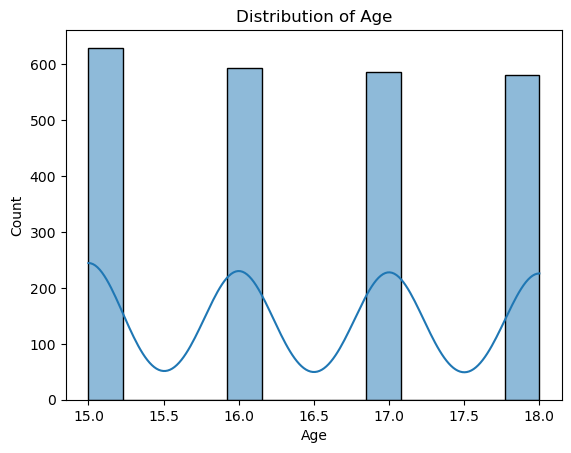

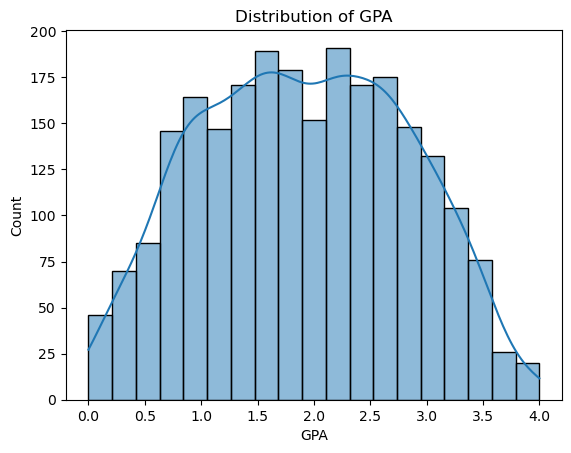

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of GPA
sns.histplot(df['GPA'], kde=True)
plt.title('Distribution of GPA')
plt.show()


**The data is almost evenly distributed for all age groups and the GPA has a normal distribution.**

<h4>Now let us see if data is distributed evenly for gender, ethinicity & parental education.</h4>

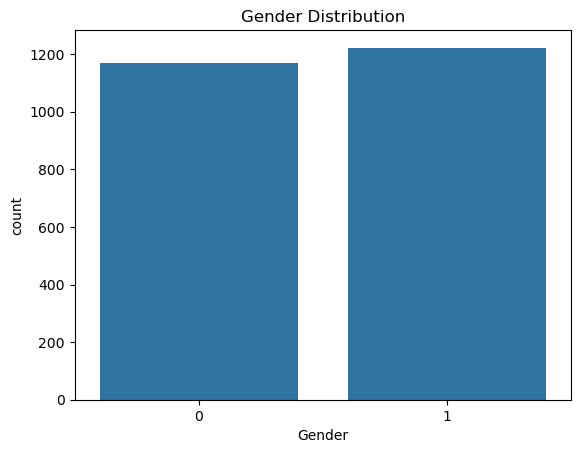

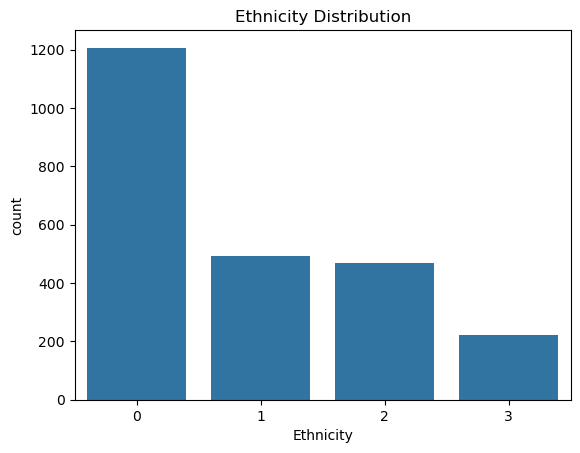

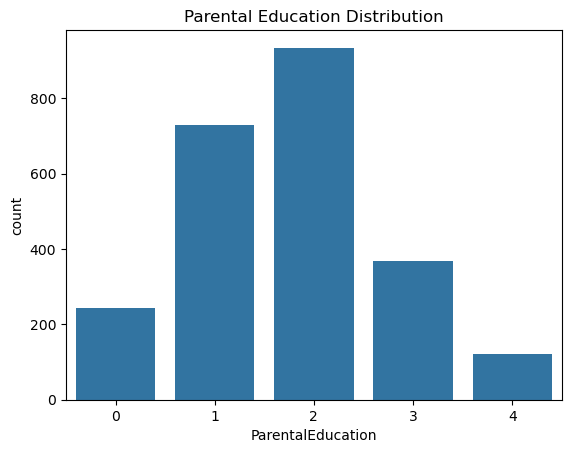

In [35]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Ethnicity distribution
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.show()

# Parental Education distribution
sns.countplot(x='ParentalEducation', data=df)
plt.title('Parental Education Distribution')
plt.show()


**We have equal data for men and women. But the sample size for caucassian students is more than twice of student's from other ethinicity. Most parent's education seems to be in group 2(some college)**

<h4>Now I want to see if there is some form of correlation between the variables. Specially I am curious about the correlation of different variables with GPA/GPAClass which is my target variable.</h4>

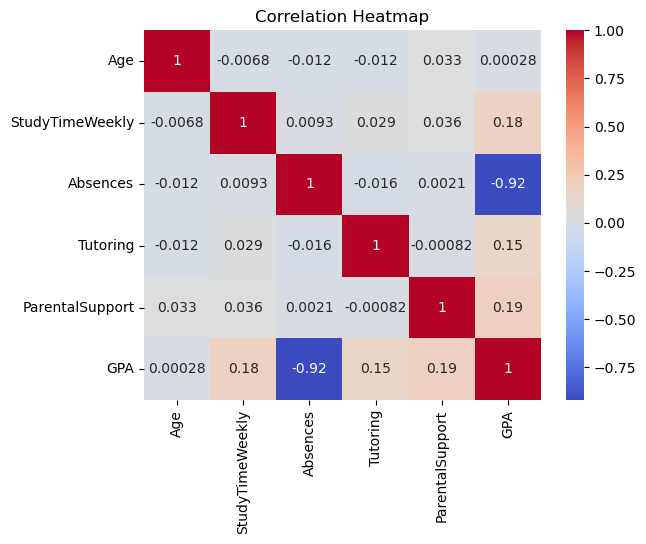

In [36]:
# Correlation heatmap for numeric columns
corr = df[['Age', 'StudyTimeWeekly', 'Absences','Tutoring', 'ParentalSupport', 'GPA']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**From the above chart I can see that there is very little correlation between Age & GPA. The correlation between Study time, training and Parental Support is positive with GPA but not significantlly high.**

**The most interesting correlation is between Absences & GPA. They seem to be negatively correlated. I would assume Absences is an important feature while building my classifier**

<h4>To get a more detailed understanding of the correlation let us build a scatter plot between StudyTimeWeekly & GPA, as well as Absence & GPA to get a better visualization.</h4>

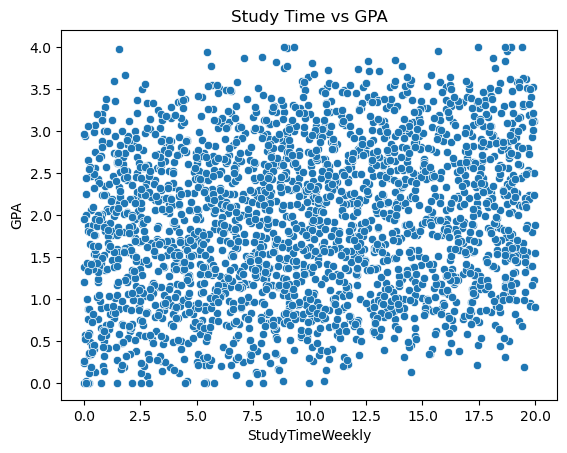

In [37]:
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Study Time vs GPA')
plt.show()


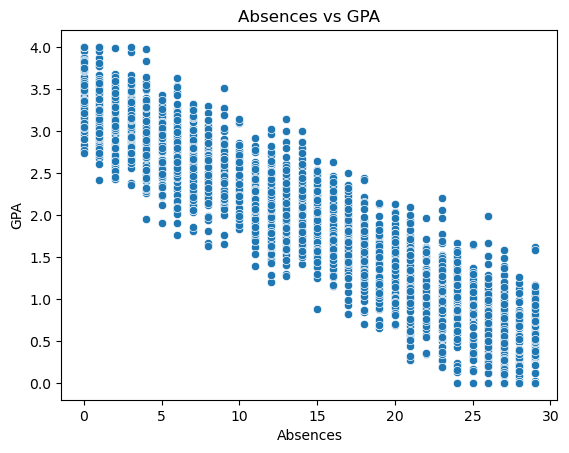

In [38]:
sns.scatterplot(x='Absences', y='GPA', data=df)
plt.title('Absences vs GPA')
plt.show()


**Look at the two graphs above. The first one shows correlation between StudyTimeWeekly & GPA with a factor of 0.18. From the first graph we can say that there does not seem to be any significant correlation.**

**Where as when we see the second graph. There is a very clear negative correlation between absences & GPA**

<h4>I want get some understanding of my target variable. How is the distribution?</h4>

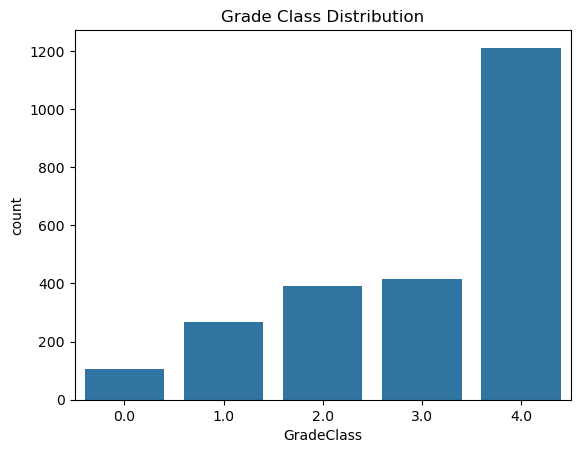

In [39]:
# Visualize the distribution of GradeClass
sns.countplot(x='GradeClass', data=df)
plt.title('Grade Class Distribution')
plt.show()


**The sample size for GradeClass 4 is significantly larger than for other GradeClasses.**

**My Classifer maybe good at predicting GradeClass 4 but may not do so well on GradeClass 0 because the sample size is very small and hence the GradeClass 4 will have very low support.**

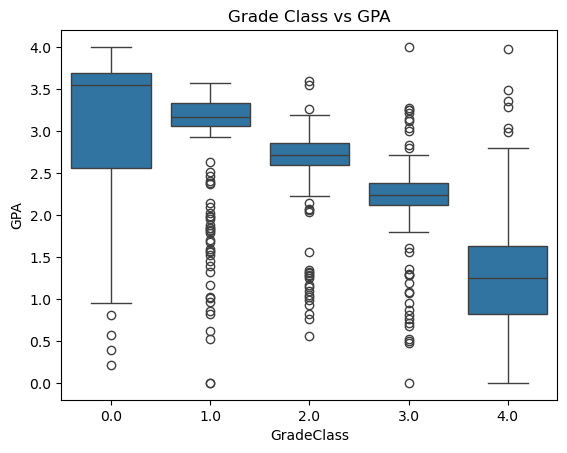

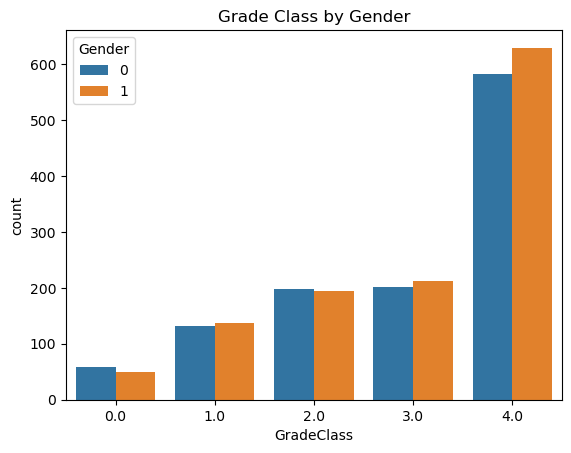

In [40]:
# Visualize how different features affect GradeClass
sns.boxplot(x='GradeClass', y='GPA', data=df)
plt.title('Grade Class vs GPA')
plt.show()

sns.countplot(x='GradeClass', hue='Gender', data=df)
plt.title('Grade Class by Gender')
plt.show()


**From the first graph I can see that the data is misclassified.**

**GradeClass 0 must have data points with GPA >= 3.5 but it has data points for GPA < 3.5 as well. Similary there seems to be 4 data points as shown in the first box plot that have GPA < 1 as well.**

**The GradeClass 1,2,3 & 4 seem to be misclassified as well.**

<h4>Let us deep dive into the target variable's misclassification.</h4>

**The GradeClass 2 must have data points with 2.5 <= GPA < 3.0. I want to if there are data points in GradeClass 2 that have GPA less than 2.5**

In [41]:
# Filter for GradeClass 2 and GPA less than 2.5
gradeclass_2_low_gpa = df[(df['GradeClass'] == 2) & (df['GPA'] < 2.5)]

# Display the filtered data
print(gradeclass_2_low_gpa)


      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2182       3183   17       0          2                  3        17.086920   
2192       3193   16       1          1                  2        15.827054   
2201       3202   16       1          0                  1         8.188959   
2225       3226   15       0          2                  1         5.880068   
2226       3227   17       0          0                  1        11.197862   
2247       3248   17       1          2                  1         8.033063   
2250       3251   15       0          2                  2         5.708106   
2252       3253   17       1          2                  1         8.647927   
2255       3256   18       0          0                  2         3.777404   
2264       3265   16       0          2                  1         3.423695   
2273       3274   16       1          2                  1         6.373945   
2276       3277   18       1          1             

In [42]:
# Count the number of rows matching the condition
count = df[(df['GradeClass'] == 2) & (df['GPA'] < 2.5)].shape[0]

# Display the count
print(f"Number of data points with GradeClass 2 and GPA less than 2.5: {count}")


Number of data points with GradeClass 2 and GPA less than 2.5: 26


In [43]:
# Count the number of rows matching the condition
count = df[(df['GradeClass'] == 0) & (df['GPA'] < 3.5)].shape[0]

# Display the count
print(f"Number of data points with GradeClass 0 and GPA less than 3.5: {count}")


Number of data points with GradeClass 0 and GPA less than 3.5: 36


<h3>We will have to reclassify the GradeClass based on the GPA.</h3>

In [44]:
import numpy as np

#Save old data set as df_old
df_old = df.copy()

# Reclassify GradeClass based on GPA
df['GradeClass'] = np.select(
    [
        df['GPA'] >= 3.5,
        (df['GPA'] >= 3.0) & (df['GPA'] < 3.5),
        (df['GPA'] >= 2.5) & (df['GPA'] < 3.0),
        (df['GPA'] >= 2.0) & (df['GPA'] < 2.5),
        df['GPA'] < 2.0
    ],
    [0, 1, 2, 3, 4]  # Corresponding GradeClass values
)

# Display the updated DataFrame
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1             0  3

<h4>Now let us look at the box plot again.</h4>

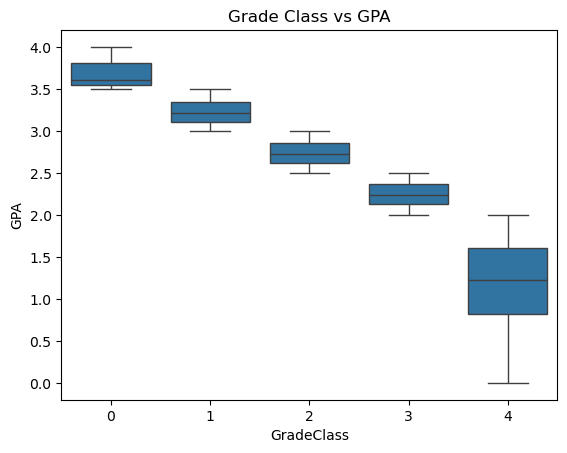

In [45]:
sns.boxplot(x='GradeClass', y='GPA', data=df)
plt.title('Grade Class vs GPA')
plt.show()

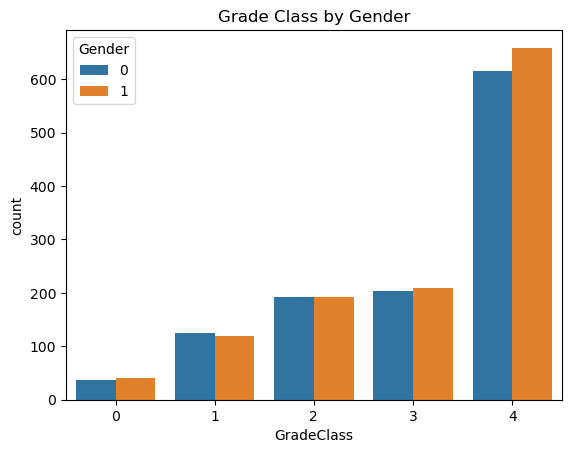

In [46]:
sns.countplot(x='GradeClass', hue='Gender', data=df)
plt.title('Grade Class by Gender')
plt.show()

<h1>Models</h1>

<h3>Baseline Model</h3>

**We can see from the graph above that majority of the data (about 50%) belongs to GradeClass 4. Hence creating a model that predicts all the inputs as GradeClass 4 should give us about 50% accuracy**

In [47]:
# Calculate the proportion of each class in the 'GradeClass' column
prop_table = df['GradeClass'].value_counts(normalize=True)

# Print the proportions
print(prop_table)


GradeClass
4    0.532609
3    0.172241
2    0.160953
1    0.102007
0    0.032191
Name: proportion, dtype: float64


**Above given code shows us the proportions of all classes. 53% of samples belong to GradeClass 4.**

**Let us split the data set into train and test and define the targe variable**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = df.drop(columns=['GradeClass'])  # Drop the target variable
y = df['GradeClass']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>The first baseline model predicts all the output as gradeClass 4.</h3>

In [49]:
def everythingIs4(y_test):
    return np.sum(np.array(y_test) == 4)/len(y_test)



In [50]:
print(everythingIs4(y_test))

0.5198329853862212


**We get an accuracy of 52% with our baseline model.**

<h3>Let us try to build a KNN classifier.</h3>

KNN Model Accuracy: 0.6889352818371608

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.41      0.33      0.36        49
           2       0.39      0.49      0.43        80
           3       0.50      0.41      0.45        85
           4       0.90      0.94      0.92       249

    accuracy                           0.69       479
   macro avg       0.56      0.50      0.52       479
weighted avg       0.68      0.69      0.68       479



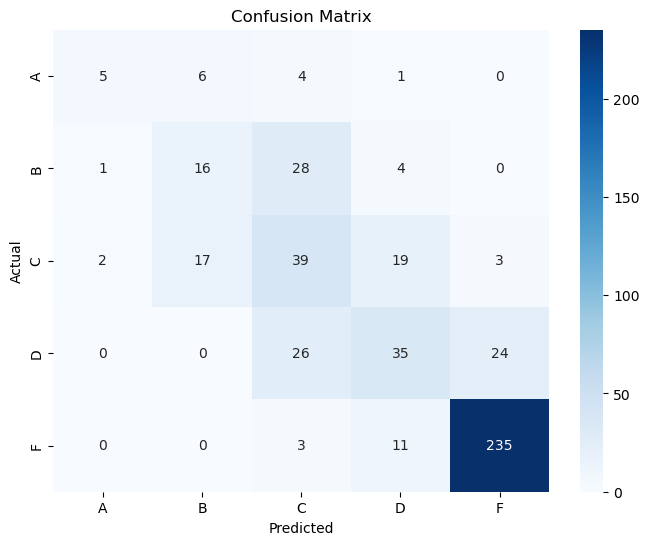

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors


knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)


print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Accuracy of 68% & the recall values seem to be very low too. We can do better than this. Let us increase the number of neighbours to 10**

KNN Model Accuracy: 0.6805845511482255

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.25      0.36        16
           1       0.36      0.29      0.32        49
           2       0.48      0.54      0.51        80
           3       0.46      0.29      0.36        85
           4       0.83      0.96      0.89       249

    accuracy                           0.68       479
   macro avg       0.56      0.47      0.49       479
weighted avg       0.65      0.68      0.66       479



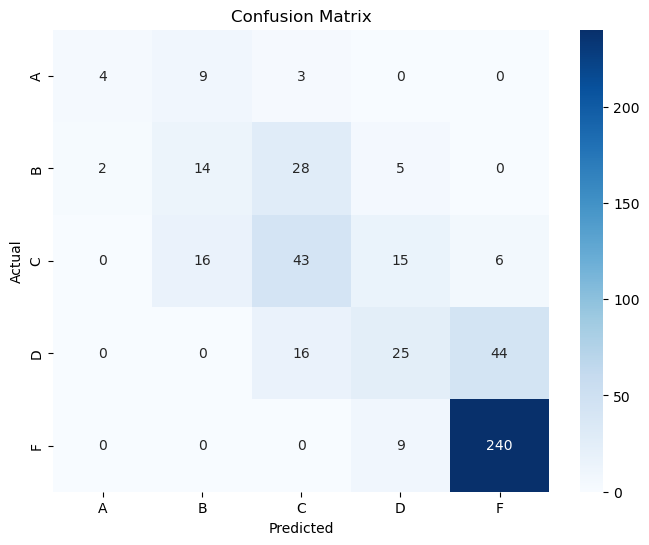

In [52]:
knn = KNeighborsClassifier(n_neighbors=10)  # new value 10


knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)


print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Still a low accuracy with low recall.**

<h3>Decision Tree</h3>

In [53]:
decisionTree_model = DecisionTreeClassifier(random_state=42)
decisionTree_model.fit(X_train, y_train)

# Predictions
y_pred_decisionTree = decisionTree_model.predict(X_test)

# Evaluate the model
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_decisionTree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_decisionTree))

Baseline Model Accuracy: 0.9979123173277662

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        49
           2       1.00      0.99      0.99        80
           3       0.99      1.00      0.99        85
           4       1.00      1.00      1.00       249

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



**Yup!!! It cannot get better than this.**